In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining Class/Shallow Learning/adult.csv')

### After reading the data we will see the data head to have a first look at our data, what are the column names and try to extract what info we can get from those column names and from general outlook of our data. Forexample this gives us a general idea about what type of data is stored in which column (numeric, categorical, TimeSeries, continuous, discrete data etc). Then we will see general shape which tells give us info how many rows and columns are there in our data. Then we will check general statistical measures of our data which will be performed only on numeric data and not on categorical columns. 

In [27]:
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [28]:
df.shape

(48842, 15)

### From this general statistical measure we can also get a quick info that which columns will contain outlier values. Forexample by looking at the std values for columns "capital-gain" and "capital-loss" we can say that the values are very much away from the mean this is the reason we are getting such big values for std against those specific columns. We were lucky enough that our data set has no unique values in it.

In [29]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### We found that there are no missing values in our Adult data set as N/A values as we all know have a great impact on visualization. So we always detect them at the very beginning and will always handle them right away as it is an established fact that N/A values will corrupt our data and there is no sonse to visualize data prior to handling our N/A values in it. So we can proceed to other EDA processes with peace of mind.

In [30]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

This will show us the exact amount of unique values in each column.

In [31]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

### Now we will perform Data Visualization prior to any other data preprocessing step. We will visualize each column in our data. Initially we visualized our "age" column using histogram. We divided our age into 6 categories (bins=6) and we observed that aprox 80% of the employes belonged to first 3 categories (i.e were between 17 to 52 years of age approx.)

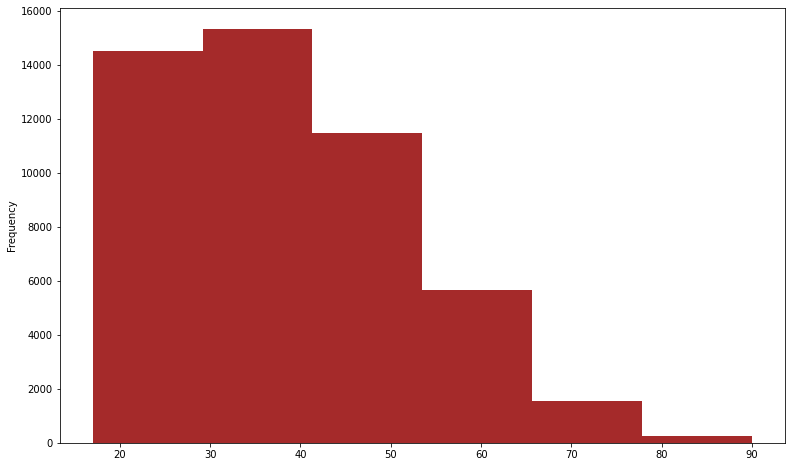

In [32]:
df.age.plot.hist(bins=6, figsize=(13,8), color = 'brown')

### We observed that there were 9 categories in total against "workclass" column. Next we found the total size of each category using groupby and size functions. This showed us that most of the employees belonged to the Private sector as the total No. of employees in Private Sector = 33906. If required we can also calculate the %age distribution of employees against each group. Our Count Plot gives us a birds eye view and we saw that the same info was shown there too. 

In [33]:
df['workclass'].nunique()

9

In [34]:
df.groupby('workclass').size()

workclass
?                    2799
Federal-gov          1432
Local-gov            3136
Never-worked           10
Private             33906
Self-emp-inc         1695
Self-emp-not-inc     3862
State-gov            1981
Without-pay            21
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


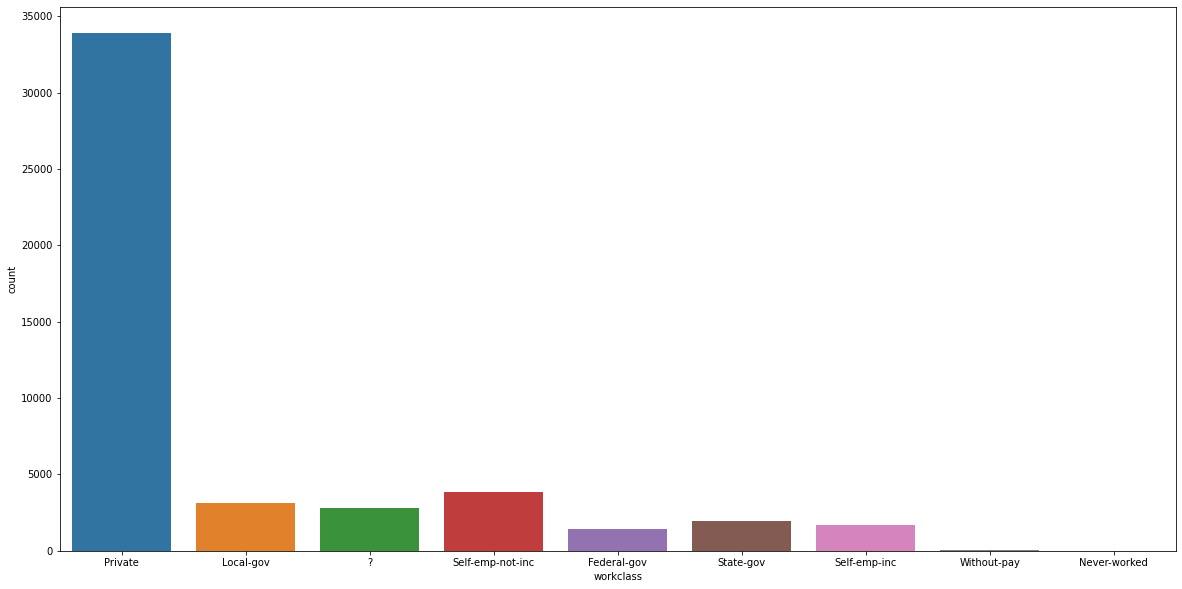

In [35]:
plt.rcParams['figure.figsize']=20,10
sns.countplot('workclass', data=df)

### We saw that there 16 different unique categories in education column. We observed that the eduaction level of max employees in our data set was HS-grad and only a few employees were those whose education level was Preschool. The count plot also gives us same information. Viewing the count plot one can quickly determine approx. 60-70 % of employees were either holding HS-grad, Some-college or bachelors degrees and only few of them were holding other degrees or had very low education levels.

In [36]:
df['education'].nunique()

16

In [37]:
df.groupby('education').size()

education
10th             1389
11th             1812
12th              657
1st-4th           247
5th-6th           509
7th-8th           955
9th               756
Assoc-acdm       1601
Assoc-voc        2061
Bachelors        8025
Doctorate         594
HS-grad         15784
Masters          2657
Preschool          83
Prof-school       834
Some-college    10878
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


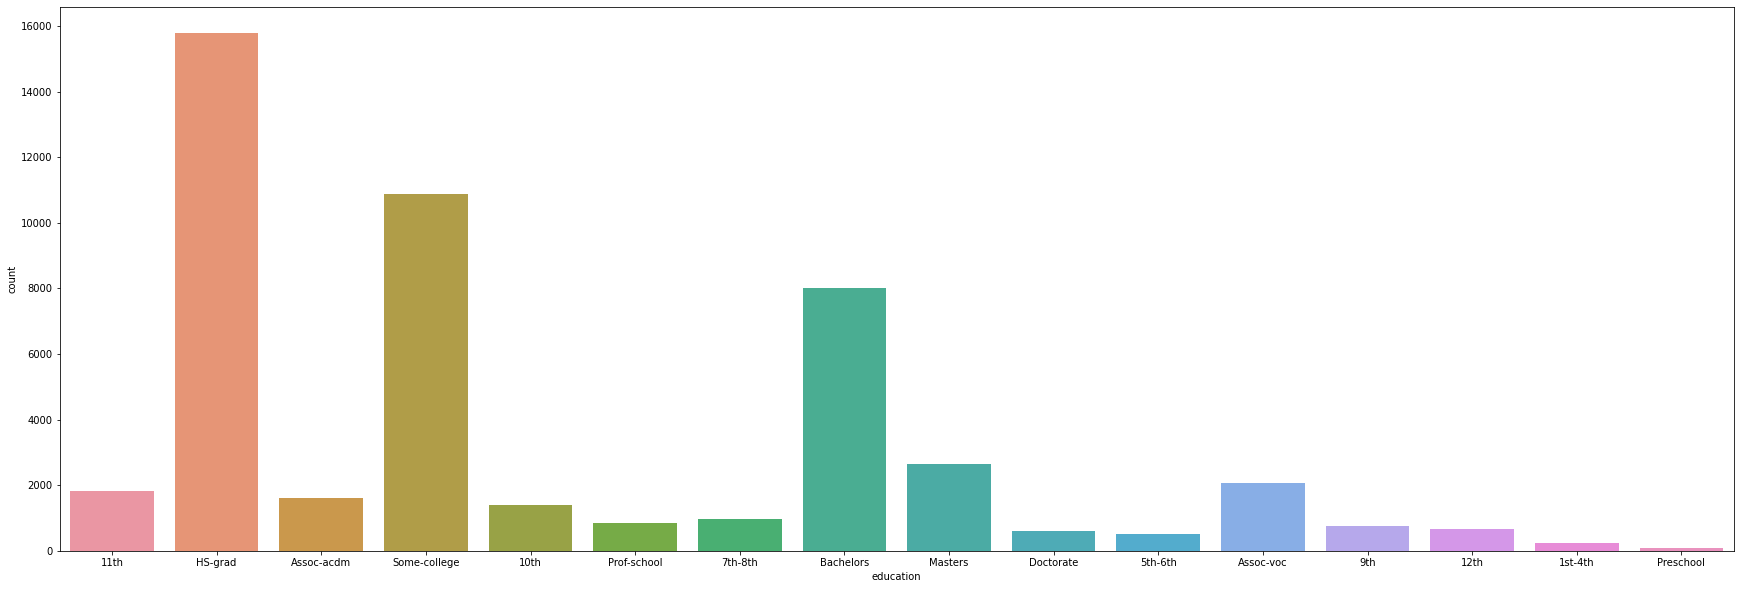

In [38]:
plt.rcParams['figure.figsize']=30,10
sns.countplot('education', data=df)

### Again we saw that there 16 different unique categories in education column. Although the data here too was categorical but it was coded categorical data and there seems a high correlation between the "education" and "education-nums" columns.

In [39]:
df['educational-num'].nunique()

16

In [40]:
df.groupby('educational-num').size()

educational-num
1        83
2       247
3       509
4       955
5       756
6      1389
7      1812
8       657
9     15784
10    10878
11     2061
12     1601
13     8025
14     2657
15      834
16      594
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


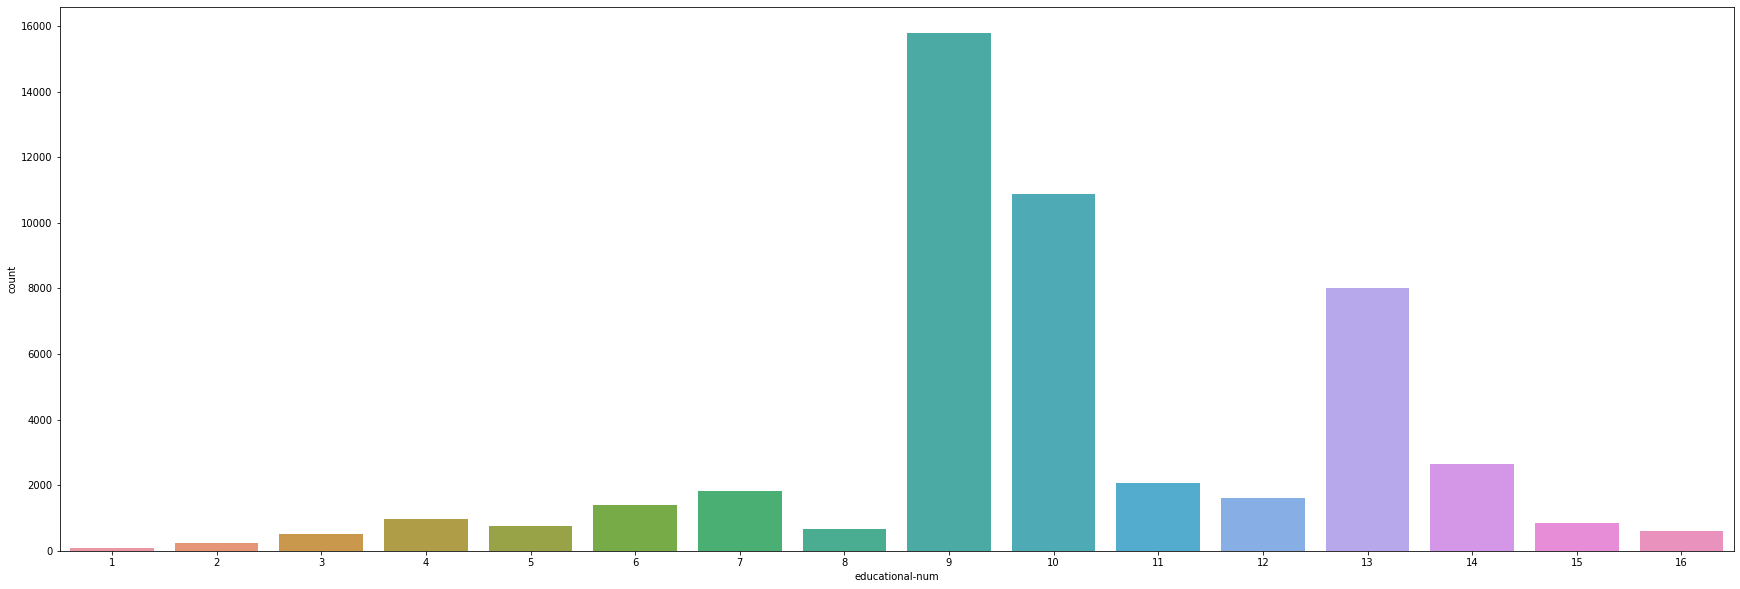

In [41]:
plt.rcParams['figure.figsize']=30,10
sns.countplot('educational-num', data=df)

### From the numeric data of Educational-num column and education column, I found that there is a strong correlation between both. Lets check it further. If it will be true we can drop education column which will help us in dimensionality reduction.

In [42]:
df.groupby(['education', 'educational-num']).size()

education     educational-num
10th          6                   1389
11th          7                   1812
12th          8                    657
1st-4th       2                    247
5th-6th       3                    509
7th-8th       4                    955
9th           5                    756
Assoc-acdm    12                  1601
Assoc-voc     11                  2061
Bachelors     13                  8025
Doctorate     16                   594
HS-grad       9                  15784
Masters       14                  2657
Preschool     1                     83
Prof-school   15                   834
Some-college  10                 10878
dtype: int64

In [82]:
df['income'] = df['income'].astype("category").cat.codes

Text(0, 0.5, 'educational-num')

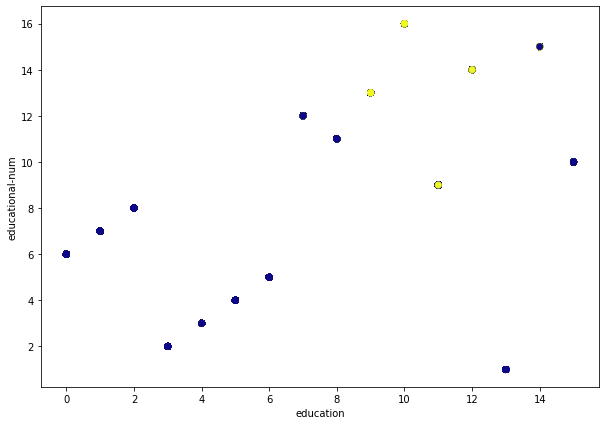

In [83]:
plt.figure(figsize=(10,7))
plt.scatter(df['education'], df['educational-num'], c=df['income'], cmap='plasma')
plt.xlabel('education')
plt.ylabel('educational-num')


In [44]:
df['education'] = df['education'].astype("category").cat.codes

In [45]:
df['education'].nunique()

16

### Now we need to find correlation. We can use both groupby() to numerically observe correlation or we can use heat map. To create heat map we need numeric data and thus we need to first convert all the categories into codes. We can also convert all the categorical attributes by storing the attribute names in the form of a list and them using for loop on the while list. But initially we will only convert this attribute ("education") to find correlation b/w attribute "education" and "eduvational-nums". The heat map shows that there is very strong correlation between "eduaction" and "educational-num" columns. So we can drop the education column.

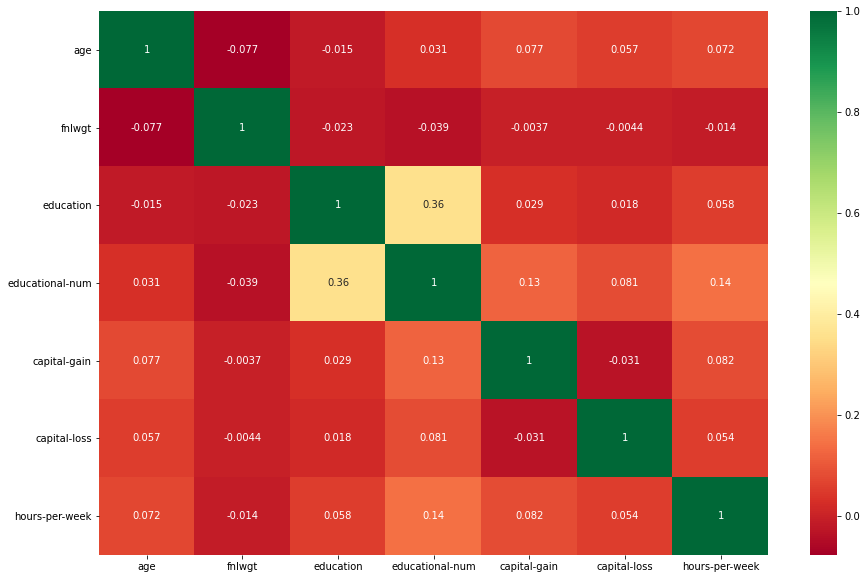

In [46]:
plt.figure(figsize=(15,10))
x = sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

### Marrital status column shows most of the employees belonged to Married-civ-spouse category

In [47]:
df.groupby('marital-status').size()

marital-status
Divorced                  6633
Married-AF-spouse           37
Married-civ-spouse       22379
Married-spouse-absent      628
Never-married            16117
Separated                 1530
Widowed                   1518
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


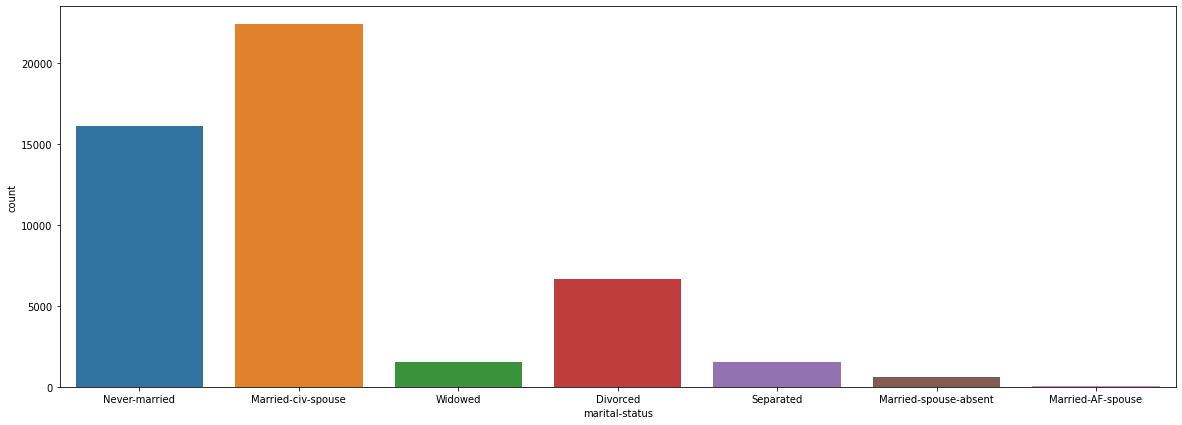

In [48]:
plt.rcParams['figure.figsize']=20,7
sns.countplot('marital-status', data=df)

### The Occupation column shows that most of the employees have Prof-Speciality, Craft-repair or were Exec-managers

In [49]:
df.groupby('occupation').size()

occupation
?                    2809
Adm-clerical         5611
Armed-Forces           15
Craft-repair         6112
Exec-managerial      6086
Farming-fishing      1490
Handlers-cleaners    2072
Machine-op-inspct    3022
Other-service        4923
Priv-house-serv       242
Prof-specialty       6172
Protective-serv       983
Sales                5504
Tech-support         1446
Transport-moving     2355
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


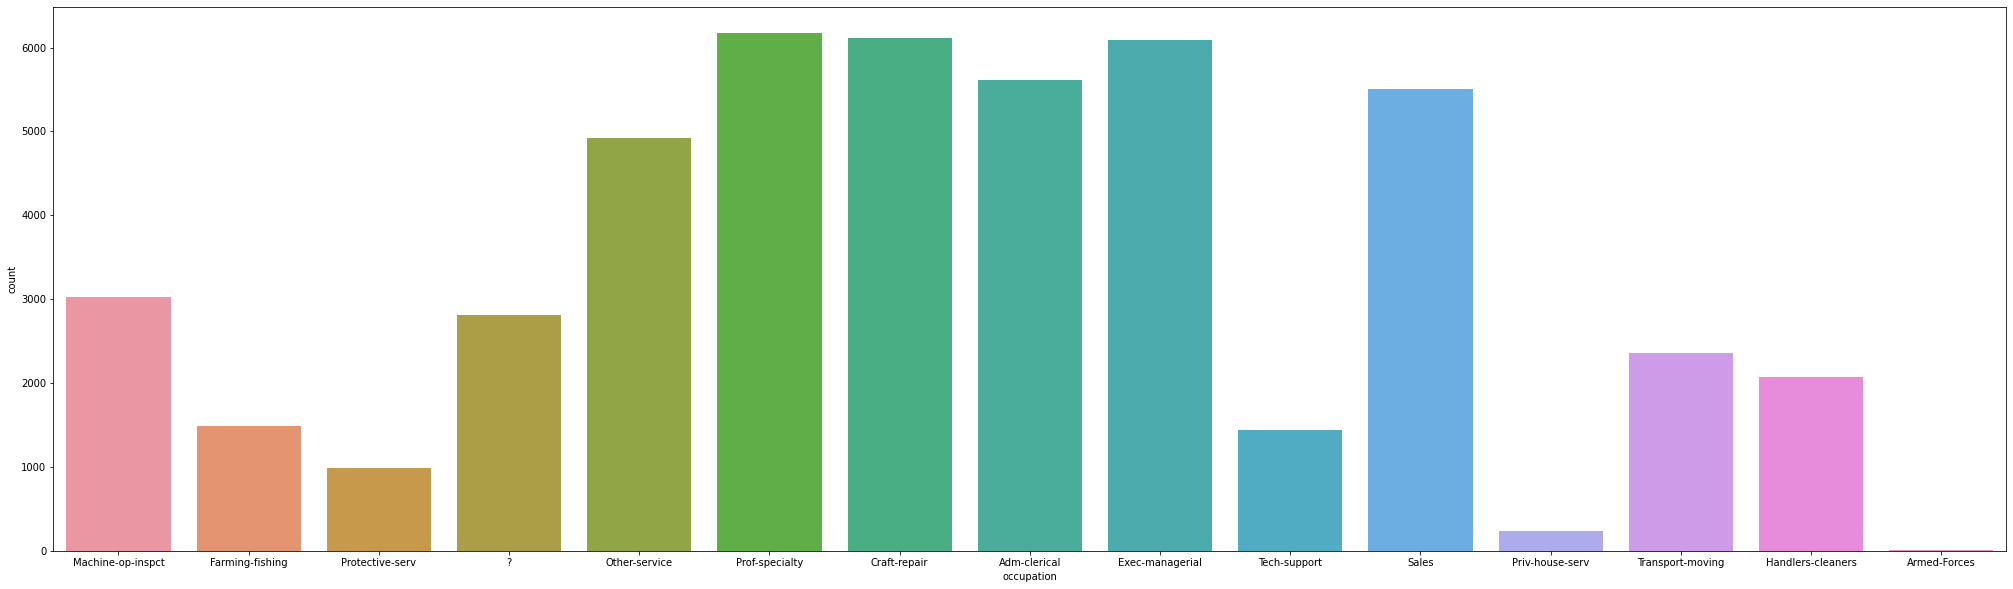

In [50]:
plt.rcParams['figure.figsize']=35,10
sns.countplot('occupation', data=df)

### Relationship column shows that most employees were married males.

In [51]:
df.groupby('relationship').size()

relationship
Husband           19716
Not-in-family     12583
Other-relative     1506
Own-child          7581
Unmarried          5125
Wife               2331
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


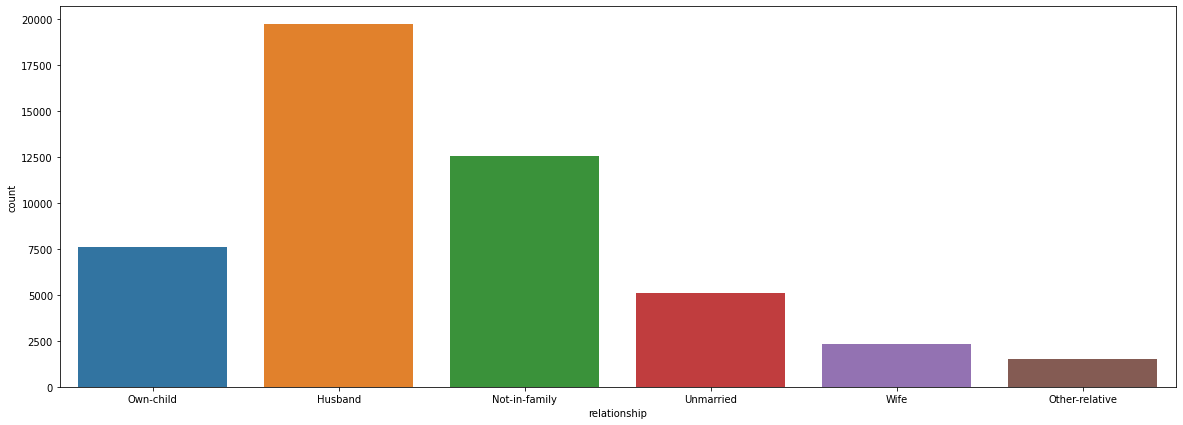

In [52]:
plt.rcParams['figure.figsize']=20,7
sns.countplot('relationship', data=df)

### The race column visualization the most of the employees were "White"

In [53]:
df.groupby('race').size()

race
Amer-Indian-Eskimo      470
Asian-Pac-Islander     1519
Black                  4685
Other                   406
White                 41762
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


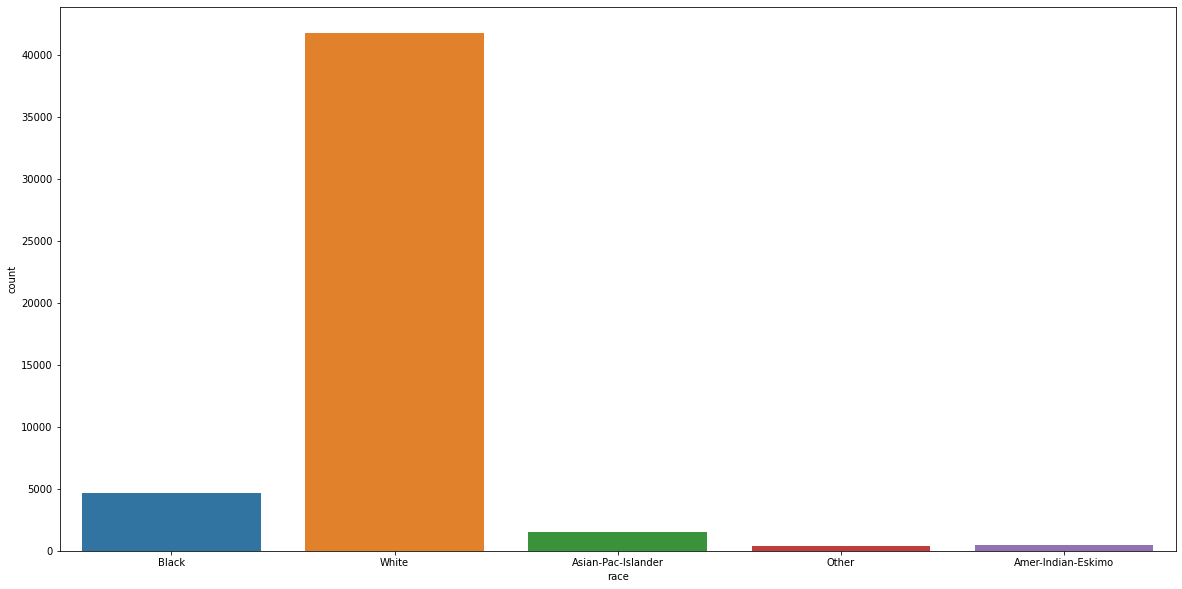

In [54]:
plt.rcParams['figure.figsize']=20,10
sns.countplot('race', data=df)

### The Gender column visualization shows that there are more Male employees compared to the female employees.

In [55]:
df.groupby('gender').size()

gender
Female    16192
Male      32650
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


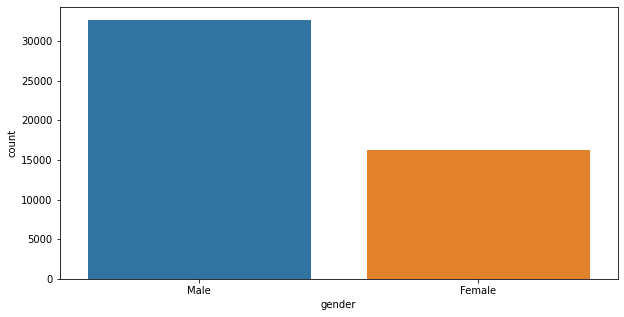

In [56]:
plt.rcParams['figure.figsize']=10,5
sns.countplot('gender', data=df)

In [57]:
df.groupby('capital-gain').size()

capital-gain
0        44807
114          8
401          5
594         52
914         10
         ...  
25236       14
27828       58
34095        6
41310        3
99999      244
Length: 123, dtype: int64

In [58]:
df.groupby('capital-loss').size()

capital-loss
0       46560
155         1
213         5
323         5
419         3
        ...  
3175        2
3683        2
3770        4
3900        2
4356        3
Length: 99, dtype: int64

In [59]:
df.groupby('hours-per-week').size()

hours-per-week
1      27
2      53
3      59
4      84
5      95
     ... 
95      2
96      9
97      2
98     14
99    137
Length: 96, dtype: int64

In [60]:
df.groupby('native-country').size()

native-country
?                               857
Cambodia                         28
Canada                          182
China                           122
Columbia                         85
Cuba                            138
Dominican-Republic              103
Ecuador                          45
El-Salvador                     155
England                         127
France                           38
Germany                         206
Greece                           49
Guatemala                        88
Haiti                            75
Holand-Netherlands                1
Honduras                         20
Hong                             30
Hungary                          19
India                           151
Iran                             59
Ireland                          37
Italy                           105
Jamaica                         106
Japan                            92
Laos                             23
Mexico                          951
Nicaragua    

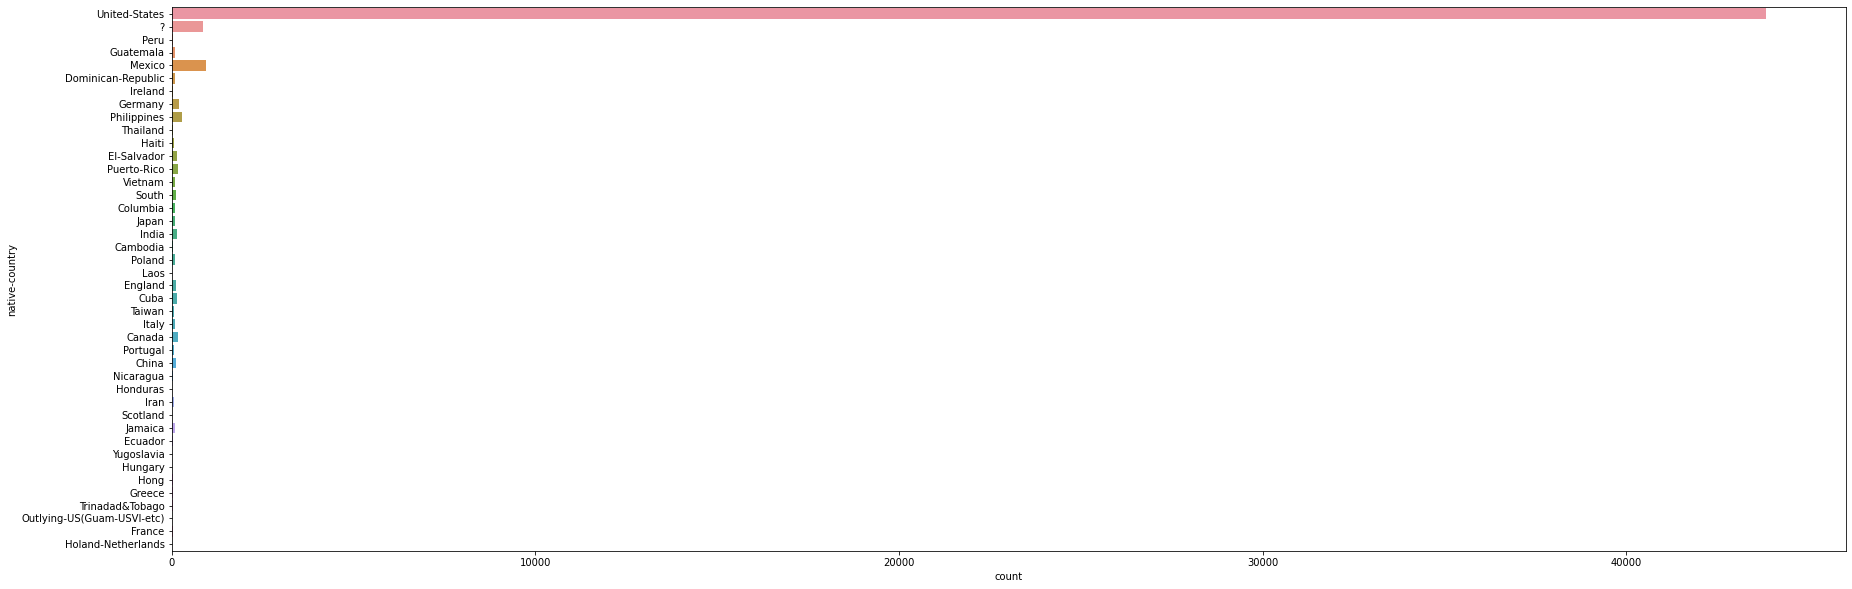

In [61]:
plt.rcParams['figure.figsize']=30,10
sns.countplot(y='native-country', data=df)

In [62]:
df.groupby('income').size()

income
<=50K    37155
>50K     11687
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


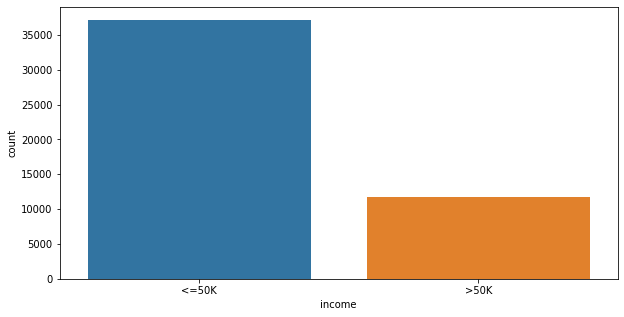

In [63]:
plt.rcParams['figure.figsize']=10,5
sns.countplot('income', data=df)

### Now we will convert all the categorical attributes into codes and then we will normalize our data using min max normalization. This normalization has no impact on outlier detection but is really helpful in PCA (Principal Component Analysis) a Dimensionality reduction technique as well as normalization will really help us train our ML models in a better way. Infact it is better to implement PCA prior to outlier detection and analysis as it will help us save money and computational cost. so we will first implement PCA and reduce the Dimensions.

In [64]:
for i in df[['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']]:
  df[i] = df[i].astype("category").cat.codes
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


### Outlier Analysis prior to Data Normalization

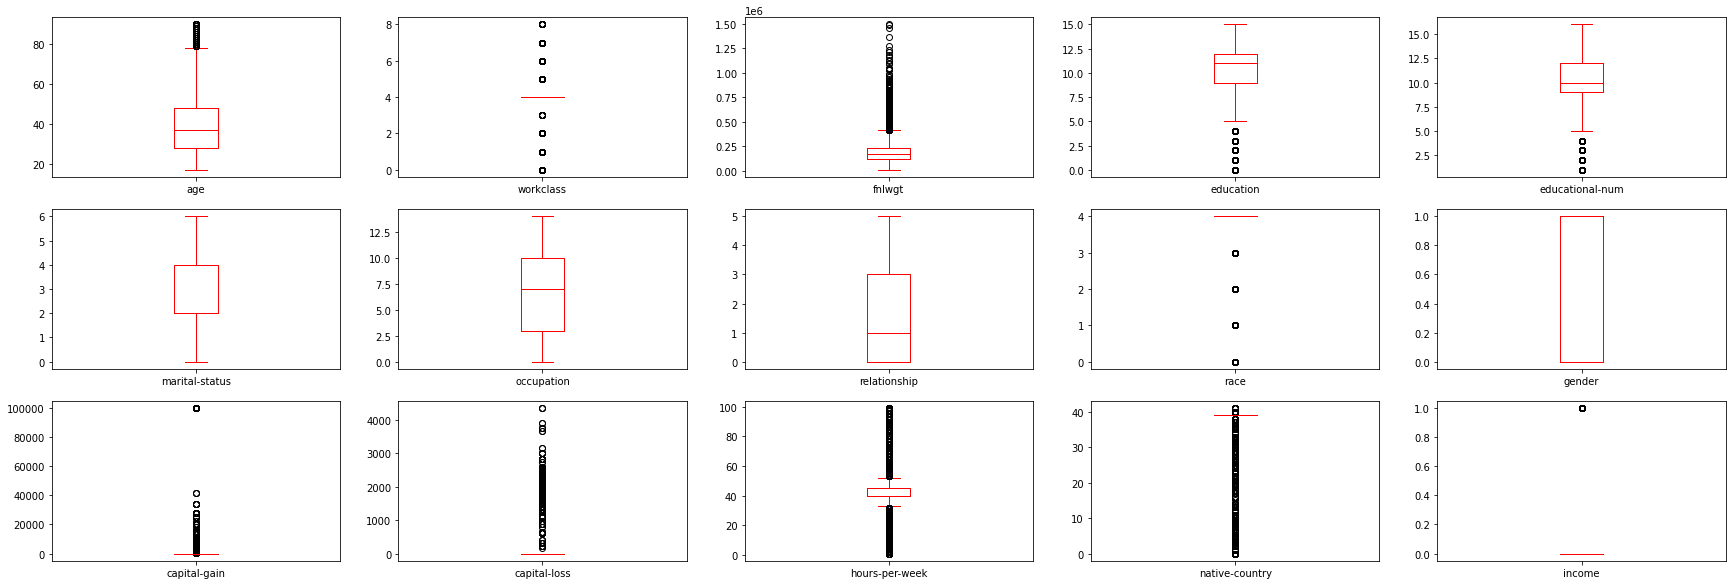

In [65]:
df.plot(kind = 'box', figsize = (30,10), subplots = True, layout = (3,5), sharex = False, sharey = False, color = 'r')
plt.show()

### Data Normalization can be done using min max normalization (min.max normalization  = ( x - min(x)) / (max(x) - min(x) ) or we can use z-score Normalization. We will use z-score Normalization as it comes in a builtin componenet of sklearn called "StandardScaler" stored in "Preprocessing module" of sklearn library - Still min max normalization code is also mentioned.

In [66]:
# df = df.apply(lambda x:(x - x.min(axis=0))/ (x.max(axis=0) - x.min(axis=0)))

from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
scaled_data = scaler.transform(df)

### We cannot handle missing values in following columns "workclass", "education", "educational-num", "marital-status", "occupation", "relation", "race", "Gender", "native country and income" as they all are Categorical Attributes. So if we will drop or replace any category it will corrupt our data and will add biase in the data. The Columns left in which we might be interested to handle outliers are "age", "fnlwgt", "capital-gain", "capital-loss" and "hours-per-week". Normally if the client provides the data dictionary and it is mentioned in the data dictionary to handle the Outlier Values according to some limit is predefined by the user then you move accordingly. But, if it is not mentioned then it is always advised to handle those values. Best approach is to replace it with median as it is insensitive to extreme values, unlike mean.

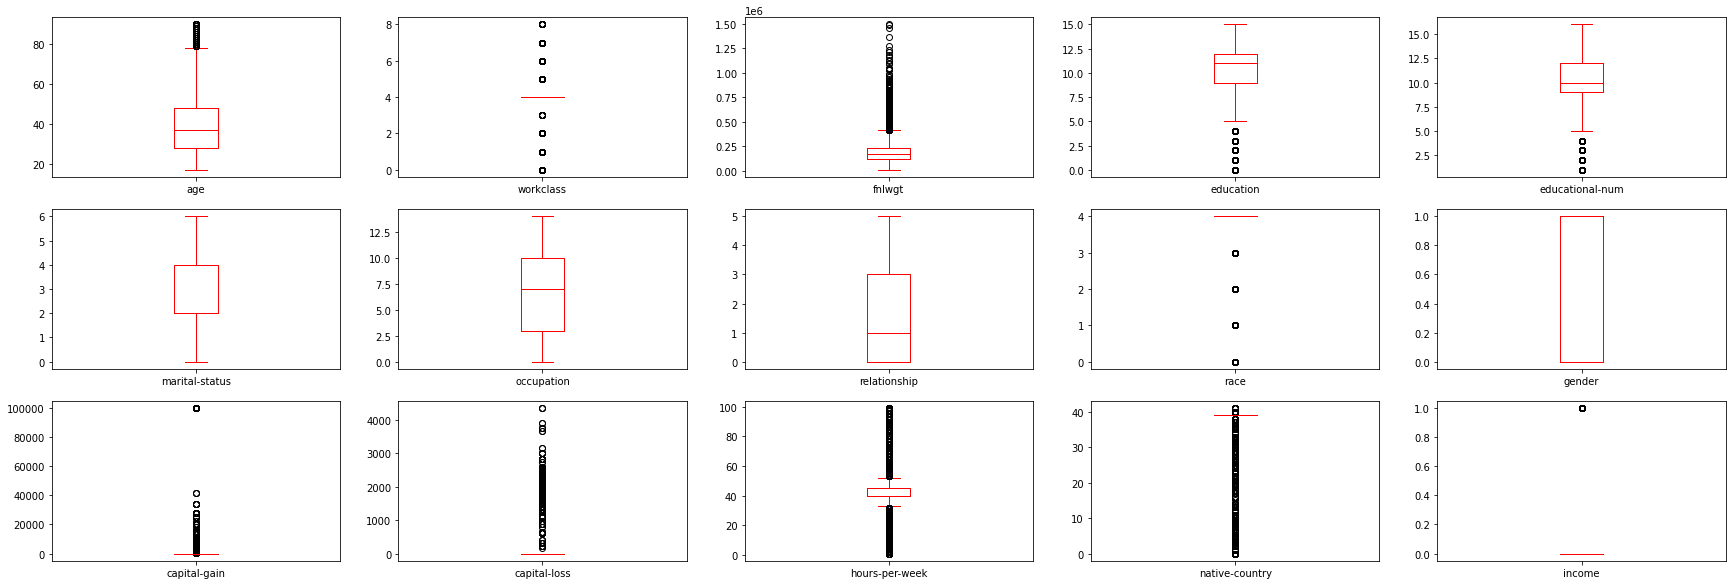

In [69]:
df.plot(kind = 'box', figsize = (30,10), subplots = True, layout = (3,5), sharex = False, sharey = False, color = 'r')
plt.show()

Implementing PCA on our data.

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=2)

In [72]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Now we converted our data containing 15 dimensions into 2 dimensions. We decreased the dimensions as it is an established fact that too many dimensions is a curse (Dimensionality Curse) because dimension is inversely propertional to the accuracy of our ML models, i.e. greater the dimensionality lesser will be the accuracy and vice versa. So we use PCA technique (which is a statistical technique and not a ML technique) to reduce the curse of dimensionality and increase the Accuracy.

In [73]:
x_pca = pca.transform(scaled_data)

In [74]:
scaled_data.shape

(48842, 15)

In [75]:
x_pca.shape

(48842, 2)

### Till now we have reduced the 15 dimensions into 2 dimensions. Now we are going to plot our data on scatter plot to visualize how our data looks like.

In [80]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


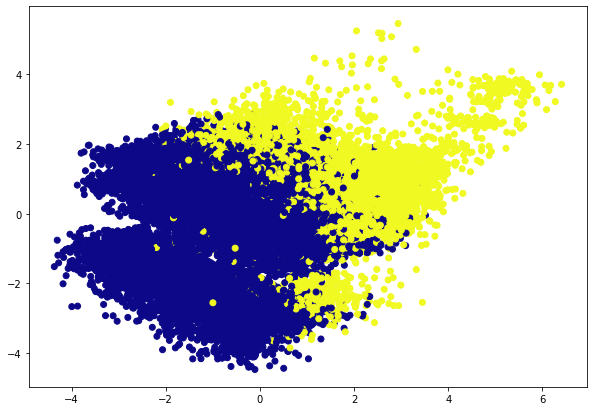

In [81]:
plt.figure(figsize=(10,7))
plt.scatter(x_pca[ : , 0], x_pca[ : , 1], c = df['income'], cmap='plasma')